# **Exercise 1: Python basics with IPython**

## **Part A: Write a word count program using IPython**
## Find: The number of unique words and top 5 most frequent words from the text document provided

In [ ]:
import numpy as np
import pandas as pd
import base64
import requests
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageDraw
from IPython.display import display, Image

In [ ]:
words = []
url = "https://raw.githubusercontent.com/Can-Berk/Machine_Learning_Labs/main/Datasets/random_text.txt"
f = requests.get(url, "r")
f = f.text
for i in f.split():
  words.append(i)

# f = open("random_text.txt", "r")

In [ ]:
frequency=dict()

In [ ]:
for line in words:
    line=line.lower() # characters are converted to lower case

    words=line.rstrip() # remove trailing spaces
    words=words.split() # list of strings by spaces
    for i in words:
        if i in frequency:
            frequency[i]+=1 # increases frequency for existing word
        else:
            frequency[i]=1

In [ ]:
list(frequency.items())[0:6]        #Text words in text writing order

[('lorem', 2),
 ('ipsum', 2),
 ('dolor', 3),
 ('sit', 8),
 ('amet,', 1),
 ('consectetur', 3)]

In [ ]:
r=list((frequency.items()))            #Putting dictionary items into a list

In [ ]:
print("The number of unique words=", len(r))     #Part A --the number of unique words by looking at the unique word length

The number of unique words= 222


In [ ]:
def number_finder(i):      #To select column 2
    return i[1]

In [ ]:
r.sort(key=number_finder,reverse=True)       #Sorting the list according to number of occurences of words in descending order
print("The top 5 most frequent words=",r[:5])

The top 5 most frequent words= [('in', 12), ('sed', 11), ('sit', 8), ('non', 8), ('at', 8)]


In [ ]:
#Another approach with dataframes

In [ ]:
df = pd.DataFrame(r)

In [ ]:
df.columns=["wordname","times"] # column names
df.head()

,wordname,times
0,in,12
1,sed,11
2,sit,8
3,non,8
4,at,8


In [ ]:
df1=df.iloc[:, ::-1]      # column order changed to see top 5 most occuring words
df1=df1.sort_values("times", ascending=False)
print("The number of unique words=", len(df1))

The number of unique words= 222


In [ ]:
top5=df1.iloc[0:5,:]
print("The top 5 most frequent words=")
print(top5)

The top 5 most frequent words=
   times wordname
0     12       in
1     11      sed
2      8      sit
3      8      non
4      8       at


## **Part B: Implement an image blurring program using numpy matrices**

### *Read and display the image*

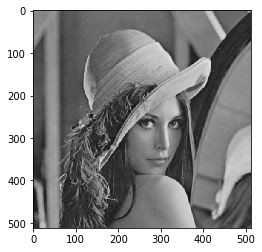

In [ ]:
!git clone https://github.com/Can-Berk/Machine_Learning_Labs/ images
from PIL import Image
img = mpimg.imread("/content/images/Datasets/lena_gray.jpg")
plt.imshow(img,cmap="gray",vmin =0,vmax = 255)

In [ ]:
plt.imsave('lena.jpg', img, cmap='gray')

### *Initialize an averaging filter and Pad the image*

In [ ]:
img_gray = Image.open("lena.jpg")       #Image load
pix_imgray = img_gray.load()

#h=np.ones((3, 3), dtype="float") * (1.0 / (3*3))

F =[[1 / 9, 1 / 9, 1 / 9],
    [1 / 9, 1 / 9, 1 / 9],
    [1 / 9, 1 / 9, 1 / 9]]        #Filter




kernel = F             #Kernel

pad = len(kernel) // 2     #Padding

convolved_img = Image.new("RGB", img_gray.size)
info = ImageDraw.Draw(convolved_img)             #Output image is created

# Compute convolution between intensity and kernels
for x in range(pad, img_gray.width - pad):
    for y in range(pad, img_gray.height - pad):        #Region of interest is processed with kernel in the following steps
        c = [0, 0, 0]
        for i in range(len(kernel)):
            for j in range(len(kernel)):
                x_n = x + i - pad
                y_n = y + j - pad
                pix = pix_imgray[x_n, y_n]
                c[0] += pix[0] * kernel[i][j]
                c[1] += pix[1] * kernel[i][j]
                c[2] += pix[2] * kernel[i][j]
        info.point((x, y), (int(c[0]), int(c[1]), int(c[2])))
        
convolved_img.save("output.jpg")

### *Plot the original and blurred images side by side*

In [ ]:
img_1 = mpimg.imread("lena.jpg")
img_2 = mpimg.imread("output.jpg")        #blurred 1 time

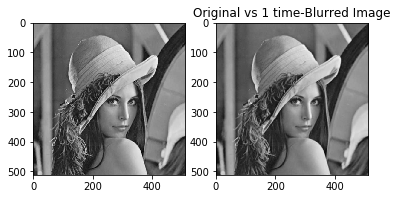

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_1)
ax[1].imshow(img_2)
plt.title("Original vs 1 time-Blurred Image")
plt.show()

In [ ]:
img_gray = Image.open("output.jpg")       #Image load
pix_imgray = img_gray.load()

#h=np.ones((3, 3), dtype="float") * (1.0 / (3*3))

F =[[1 / 9, 1 / 9, 1 / 9],
    [1 / 9, 1 / 9, 1 / 9],
    [1 / 9, 1 / 9, 1 / 9]]        #Filter




kernel = F             #Kernel

pad = len(kernel) // 2     #Padding

convolved_img = Image.new("RGB", img_gray.size)
info = ImageDraw.Draw(convolved_img)             #Output image is created

# Compute convolution between intensity and kernels
for x in range(pad, img_gray.width - pad):
    for y in range(pad, img_gray.height - pad):        #Region of interest is processed with kernel in the following steps
        c = [0, 0, 0]
        for i in range(len(kernel)):
            for j in range(len(kernel)):
                x_n = x + i - pad
                y_n = y + j - pad
                pix = pix_imgray[x_n, y_n]
                c[0] += pix[0] * kernel[i][j]
                c[1] += pix[1] * kernel[i][j]
                c[2] += pix[2] * kernel[i][j]
        info.point((x, y), (int(c[0]), int(c[1]), int(c[2])))
        
convolved_img.save("output_2x.jpg")

In [ ]:
img_3 = mpimg.imread("output_2x.jpg")

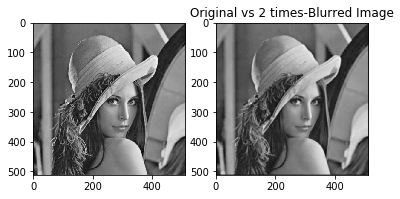

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_1)
ax[1].imshow(img_3)
plt.title("Original vs 2 times-Blurred Image")
plt.show()

In [ ]:
img_gray = Image.open("output_2x.jpg")       #Image load
pix_imgray = img_gray.load()

#h=np.ones((3, 3), dtype="float") * (1.0 / (3*3))

F =[[1 / 9, 1 / 9, 1 / 9],
    [1 / 9, 1 / 9, 1 / 9],
    [1 / 9, 1 / 9, 1 / 9]]        #Filter




kernel = F             #Kernel

pad = len(kernel) // 2     #Padding

convolved_img = Image.new("RGB", img_gray.size)
info = ImageDraw.Draw(convolved_img)             #Output image is created

# Compute convolution between intensity and kernels
for x in range(pad, img_gray.width - pad):
    for y in range(pad, img_gray.height - pad):        #Region of interest is processed with kernel in the following steps
        c = [0, 0, 0]
        for i in range(len(kernel)):
            for j in range(len(kernel)):
                x_n = x + i - pad
                y_n = y + j - pad
                pix = pix_imgray[x_n, y_n]
                c[0] += pix[0] * kernel[i][j]
                c[1] += pix[1] * kernel[i][j]
                c[2] += pix[2] * kernel[i][j]
        info.point((x, y), (int(c[0]), int(c[1]), int(c[2])))
        
convolved_img.save("output_4x.jpg")

In [ ]:
img_4 = mpimg.imread("output_4x.jpg")

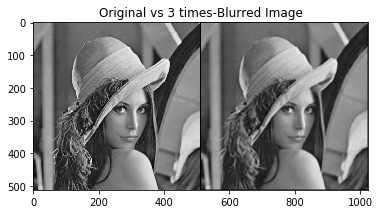

In [ ]:
plot_images = np.concatenate((img_1, img_4), axis=1)      #This time different method to show images side by side
plt.imshow(plot_images)
plt.title("Original vs 3 times-Blurred Image")
plt.show()

# **Exercise 2: Linear Regression**

### *Generate a simple data i.e. a matrix X with dimensions 100x2. Initialize it with normal distribution (2, 0.01) and target vector Y with dimensions 100x1*

In [ ]:
x0=np.ones((100,1))
x1=np.random.normal(2,0.01,(100,1))
X=np.append(x0,x1,axis=1)
#X

In [ ]:
Y=np.random.uniform(0,1,(100,1))

### *Implement simple linear regression algorithm and learn intercept(B0) and slope(B1)*

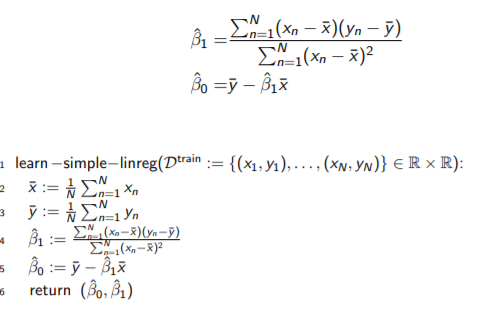

In [ ]:
Image(filename = "learn_slr.PNG", width=400, height=300)

In [ ]:
def ave(x):
    return np.mean(x)

def b1_calc(x,y):
    return ave((x-ave(x))*(y-ave(y)))/ave((x-ave(x))**2)

def b0_calc(x,y):
    return ave(y)-b1_calc(x,y)*ave(x)

In [ ]:
x_b1=b1_calc(x1,Y)
x_b0=b0_calc(x1,Y)

print("b1=", x_b1)
print("b0=", x_b0)

b1= -0.6960341709488476
b0= 1.8811757509886076


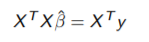

In [ ]:
Image(filename = "r_l.PNG", width=200, height=100)

In [ ]:
X_T=X.transpose()

In [ ]:
XtX=np.dot(X_T,X)
XtX

array([[100.        , 199.96584172],
       [199.96584172, 399.87328127]])

In [ ]:
#inv=np.linalg.inv(XtX)        #not using linalg, just to check
#inv

In [ ]:
def det(x):         #calculate determinant
    return x[0][0]*x[1][1] - x[0][1]*x[1][0]

def inv(x):         #inverse a matrix
    return [[x[1][1]/det(x), -x[0][1]/det(x)], [-x[1][0]/det(x), x[0][0]/det(x)]]

print("det of XtX=",det(XtX))
print("inverse matrix of XtX=", inv(XtX))

det of XtX= 0.9902712239345419
inverse matrix of XtX= [[403.8017783509933, -201.9303771436604], [-201.9303771436604, 100.98243550153904]]


In [ ]:
def multiply(a, b):
    matrix = []
    for i in range(len(b[0])):            #loops through matrix b columns
        total = 0
        for j in range(len(a[0])):        #loops through matrix a and rows of matrix b
            total += a[j] * b[j][i]
        matrix.append(total)
    return matrix

In [ ]:
A=inv(XtX)
print(A)

[[403.8017783509933, -201.9303771436604], [-201.9303771436604, 100.98243550153904]]


In [ ]:
A=np.array(A)

In [ ]:
right=np.dot(X_T,Y)
print(right)

[[48.93451624]
 [97.84542466]]


In [ ]:
print(X_T.shape)
print(Y.shape)

(2, 100)
(100, 1)


In [ ]:
Beta=multiply(A,right)
print(Beta)

[array([ 1.88117575, -0.69603417])]


In [ ]:
B0=Beta[0][0]
B1=Beta[0][1]
print("B0=",B0,"B1=",B1)

B0= 1.8811757509611198 B1= -0.6960341709364002


### *Implement simple linear regression prediction and calculate the points for each training example in matrix A and plot predicted points along with Matrix Y*

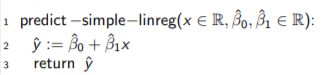

In [ ]:
Image(filename = "pred_SLR.PNG", width=300, height=150)

In [ ]:
def SLR_pred(x,b0,b1):
    return b0+b1*x

In [ ]:
y_pred=SLR_pred(x1,B0,B1)          #Predicting y values with respect to B0 and B1
#print(y_pred)
y_pred[:10]                        #Show first 10 predictions

array([[0.49720491],
       [0.4929191 ],
       [0.49508027],
       [0.49222429],
       [0.49264492],
       [0.49820902],
       [0.50018091],
       [0.48715371],
       [0.50423651],
       [0.48823708]])

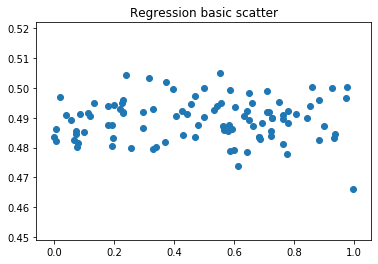

In [ ]:
plt.scatter(Y,y_pred)               #So basic no need
plt.title('Regression basic scatter')
plt.show()

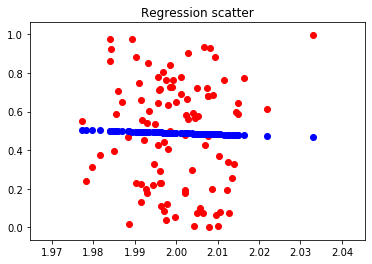

In [ ]:
plt.scatter(X[:,1],Y,color='red')                 #Comparing Y and predicted Y values
plt.scatter(X[:,1],y_pred,color='blue')
plt.title('Regression scatter')
plt.show()

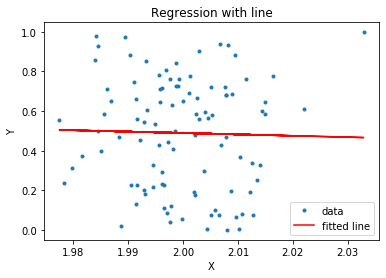

In [ ]:
fig, ax = plt.subplots()                #Simply regression with fitting line for predicted values comparing to observed values
ax.plot(X[:,1], Y,".",X[:,1],y_pred,"r")
plt.title('Regression with line')
plt.xlabel('X')
plt.ylabel('Y')
ax.legend(['data', 'fitted line'])
plt.show()

### *Learn values of B0 and B1 with numpy.linalg lstsq*

In [ ]:
Replace=np.linalg.lstsq(X,Y, rcond=1)          # Use numpy.linalg lstsq to replace step 2 for learning values of B0 and B1
print(Replace)

(array([[ 1.88117575],
       [-0.69603417]]), array([7.78896716]), 2, array([22.35780178,  0.04450901]))


In [ ]:
B0_r=Replace[0][0]
B1_r=Replace[0][1]
print("B0=",B0_r,"B1=",B1_r)        #To see if we have same values as in previous steps

B0= [1.88117575] B1= [-0.69603417]


In [ ]:
### In case we need another column (Multiple Linear Regression)
x2=np.random.normal(0,1,(100,1))
X_=np.append(X,x2,axis=1)

### References
https://programminghistorian.org/en/lessons/counting-frequencies ,
https://www.programiz.com/python-programming/methods/list/sort ,
https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/ ,
https://stackoverflow.com/questions/50559000/how-do-i-make-2-images-appear-side-by-side-in-jupyter-notebook-ipython ,
https://stackoverflow.com/questions/36508679/plotting-two-images-side-by-side-in-python ,
https://medium.com/@shuklapratik22/implementation-of-simple-linear-regression-using-normal-equation-matrices-f9021c3590da ,
https://stackoverflow.com/questions/53432089/invert-matrix-without-numpy-in-python